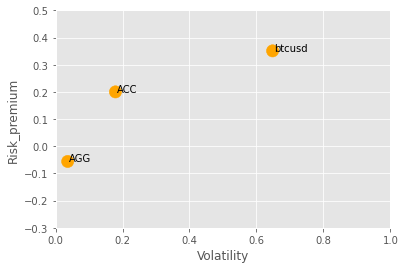

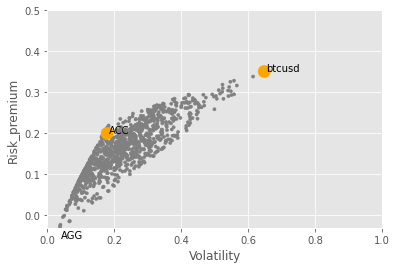

<ipython-input-64-5cb3a0d65b5c>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_sharpe = random[(random['Risk_premium']>= 0)][(random['Volatility']<= 1)].sharpe.max()


In [64]:
import pandas as pd                                    # Working with tables
import numpy as np

%run teamdoge.ipynb


from tiingo import TiingoClient                       # Stock prices.
import quandl                                         # Economic data, futures prices, ...

# API keys:
tiingo = TiingoClient({'api_key':'349dd4117e5d1ed71a22f0207a8e439cf3f7b06b'})
quandl.ApiConfig.api_key = '_ci7hzC_sPkspKWz2yzt'                      # Replace the XXXX with your API key (must be inside the ' ').

import matplotlib.pyplot as plt                        # Basic plot library.
plt.style.use('ggplot')                                # Make plots look nice.
%matplotlib inline

In this notebook, we will find the efficent frontier and max sharpe ratio weights of a portfolio of ACC and AGG.

In [68]:
tickers    = ['ACC','AGG']
start_date = '3-23-2012'
end_date   = '3-23-2022'

Now let's look at the returns

In [69]:
r = returns(tickers, start_date, end_date)
r

,ACC,AGG
2012-03-23,NaN,NaN
2012-03-26,0.019608,-0.000729
2012-03-27,-0.000679,0.001095
2012-03-28,-0.002717,-0.000182
2012-03-29,0.010443,0.002734
...,...,...
2022-03-16,0.000184,0.000743
2022-03-17,0.015789,0.001672
2022-03-18,-0.001265,0.002225
2022-03-21,-0.001086,-0.009806


In [9]:
risk_premiums = rp(tickers, start_date, end_date)
risk_premiums

ACC    0.090757
AGG    0.011045
dtype: float64

In [10]:
volatility = vol(tickers, start_date, end_date)
volatility

ACC    0.271185
AGG    0.040878
dtype: float64

In [11]:
correlation = corr(tickers, start_date, end_date)
correlation

,ACC,AGG
ACC,1.000000,0.162403
AGG,0.162403,1.000000


In [12]:
covariance = cov(tickers, start_date, end_date)
covariance

,ACC,AGG
ACC,0.073541,0.001800
AGG,0.001800,0.001671


Now we can make a mean-volatility plot to see where these two stocks stand.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

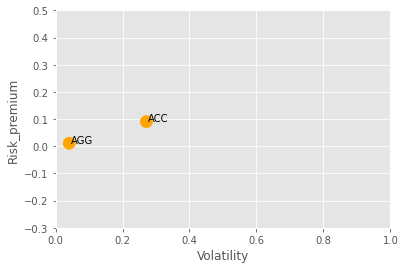

In [13]:
mean_vol_plot(risk_premiums,volatility)

We can also make an efficient frontier plot to see how different weighted combinations of these stocks would land on the mean-volatility plot.

<AxesSubplot:xlabel='Volatility', ylabel='Risk_premium'>

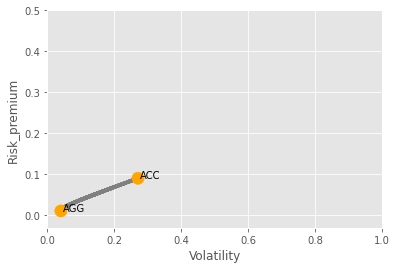

In [15]:
efficient_frontier(risk_premiums,volatility,covariance)

Time to find the weights that correspond to the maximum sharpe ratio portfolio.

In [16]:
sharpe_weights = max_sharpe_weights(risk_premiums, volatility, covariance)
sharpe_weights

,Risk_Premiums,Weights,weighted_ret
ACC,0.090757,0.169321,0.015367
AGG,0.011045,0.830679,0.009175


In [21]:
r = returns(tickers, start_date, end_date)
r

,ACC,AGG
2012-03-23,NaN,NaN
2012-03-26,0.019608,-0.000729
2012-03-27,-0.000679,0.001095
2012-03-28,-0.002717,-0.000182
2012-03-29,0.010443,0.002734
...,...,...
2022-03-16,0.000184,0.000743
2022-03-17,0.015789,0.001672
2022-03-18,-0.001265,0.002225
2022-03-21,-0.001086,-0.009806


In [40]:
rf = 0.011
r*sharpe_weights['Weights']
r['total_ret'] = r.ACC + r.AGG
r

,ACC,AGG,total_ret,risk_premium
2012-03-23,NaN,NaN,NaN,-0.022000
2012-03-26,0.019608,-0.000729,0.018879,0.072393
2012-03-27,-0.000679,0.001095,0.000416,-0.019920
2012-03-28,-0.002717,-0.000182,-0.002899,-0.036495
2012-03-29,0.010443,0.002734,0.013177,0.043885
...,...,...,...,...
2022-03-16,0.000184,0.000743,0.000927,-0.017364
2022-03-17,0.015789,0.001672,0.017460,0.065301
2022-03-18,-0.001265,0.002225,0.000960,-0.017200
2022-03-21,-0.001086,-0.009806,-0.010892,-0.076458


In [42]:
del r['risk_premium']

In [43]:
r

,ACC,AGG,total_ret
2012-03-23,NaN,NaN,NaN
2012-03-26,0.019608,-0.000729,0.018879
2012-03-27,-0.000679,0.001095,0.000416
2012-03-28,-0.002717,-0.000182,-0.002899
2012-03-29,0.010443,0.002734,0.013177
...,...,...,...
2022-03-16,0.000184,0.000743,0.000927
2022-03-17,0.015789,0.001672,0.017460
2022-03-18,-0.001265,0.002225,0.000960
2022-03-21,-0.001086,-0.009806,-0.010892


In [46]:
max_rp = r.total_ret.mean()*252 - 0.011
max_rp

0.11280262223156495

In [48]:
max_vol = r.total_ret.std()*252**0.05
max_vol

0.02331679169830983

In [49]:
max_sharpe = max_rp/max_vol
max_sharpe

4.837827763402874